**Programming Assignment 2**
# **LINEAR REGRESSION**
By Obis, Aj Dave A. and Tuatis, Juan Francis C.


In [1]:
# Import libraries
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

# Import the data
import pandas as pd
enb = pd.read_excel('ENB2012_data.xlsx', engine='openpyxl')
# Renaming the columns with more descriptive names
enb.rename(columns={ 'X1': 'Relative Compactness', 'X2': 'Surface Area', 'X3': 'Wall Area', 'X4': 'Roof Area', 'X5': 'Overall Height', 'X6': 'Orientation', 'X7': 'Glazing Area', 'X8': 'Glazing Area Distribution', 'Y1': 'Heating Load', 'Y2': 'Cooling Load'}, inplace=True)
enb.head()

,Relative Compactness,Surface Area,Wall Area,Roof Area,Overall Height,Orientation,Glazing Area,Glazing Area Distribution,Heating Load,Cooling Load
0,0.98,514.5,294.0,110.25,7.0,2,0.0,0,15.55,21.33
1,0.98,514.5,294.0,110.25,7.0,3,0.0,0,15.55,21.33
2,0.98,514.5,294.0,110.25,7.0,4,0.0,0,15.55,21.33
3,0.98,514.5,294.0,110.25,7.0,5,0.0,0,15.55,21.33
4,0.90,563.5,318.5,122.50,7.0,2,0.0,0,20.84,28.28


<Figure size 1000x1000 with 0 Axes>

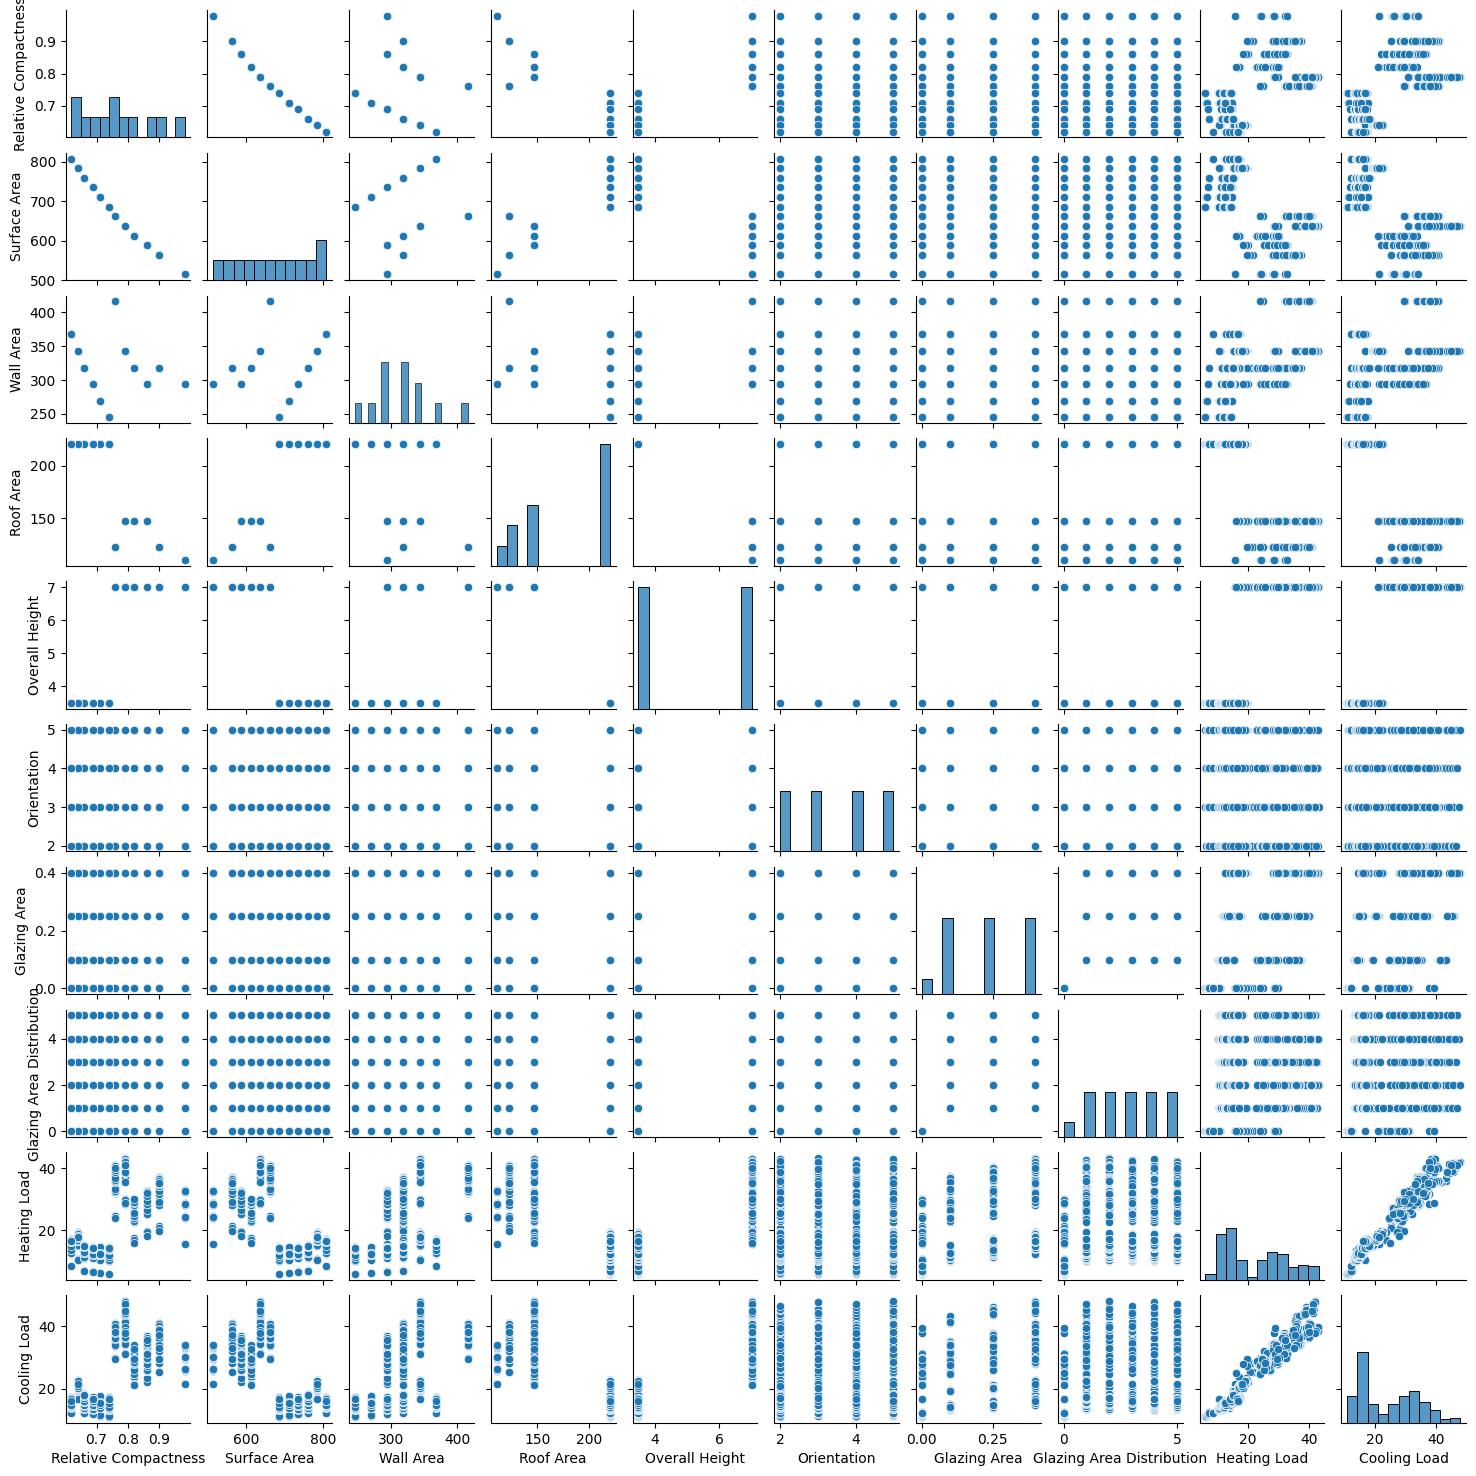

In [2]:
#  NOT SURE KUNG NECESSARY

import seaborn as sns
import matplotlib.pyplot as plt

# Generate a pair plot for the ENB dataset
plt.figure(figsize=(10, 10))
sns.pairplot(enb, height=1.5)

# Show the plot
plt.show()


## General Guidelines
### 1. Split the samples into 60% training, 20% validation, and 20% testing data at random 

In [3]:
# split off 60% training data, and 40% for validation + test sets
train_data, temp_data = train_test_split(enb, test_size=0.4, random_state=10)

# split the remaining 40% into validation (20%) and test (20%)
validation_data, test_data = train_test_split(temp_data, test_size=0.5, random_state=10)

# verify the splits
print(f"Original Data: {len(enb)} samples")
print(f"Training Data: {len(train_data)} samples")
print(f"Validation Data: {len(validation_data)} samples")
print(f"Test Data: {len(test_data)} samples")



Original Data: 768 samples
Training Data: 460 samples
Validation Data: 154 samples
Test Data: 154 samples


### 2. Using Ridge regularization, set your  own 10 different choices of regularization parameters, find the best choice that gives the highest accuracy on the validation data (based on R2)

In [4]:
from sklearn.linear_model import Ridge
from sklearn.metrics import r2_score

# from the training data
X_train = train_data.drop(columns=['Heating Load', 'Cooling Load'])
y1_train = train_data['Heating Load']

# from the validation data
X_val = validation_data.drop(columns=['Heating Load', 'Cooling Load'])
y1_val = validation_data['Heating Load']

# from the test data
X_test = test_data.drop(columns=['Heating Load', 'Cooling Load'])
y1_test = test_data['Heating Load']


# Define 10 different choices of regularization parameters (alphas)
alphas = [0.00001, 0.0001, 0.001, 0.01, 0.1, 1, 10, 100, 1000, 10000]

best_alpha = None
best_r2 = -float('inf')


# Store all the alpha and R2 values for printing later
results = []

# Iterate over each alpha value to train the Ridge model
for alpha in alphas:
    ridge_model = Ridge(alpha=alpha)
    
    # Train the model using the training data
    ridge_model.fit(X_train, y1_train)
    
    # Predict the heating load for the validation set
    y1_val_pred = ridge_model.predict(X_val)
    
    # Calculate how accurate the predictions are using R² score
    r2_val = r2_score(y1_val, y1_val_pred)
    
    # Store the alpha and corresponding R² score
    results.append((alpha, r2_val))
    
    # Get the best alpha
    if r2_val > best_r2:
        best_r2 = r2_val
        best_alpha = alpha

# Print all the alpha values and their corresponding R² scores
for alpha, r2 in results:
    print(f"Alpha: {alpha}, R² score: {r2:.4f}")

# Output the best alpha and corresponding R² score
print(f"Best alpha: {best_alpha} with R² score: {best_r2:.4f}")


Alpha: 1e-05, R² score: 0.9026
Alpha: 0.0001, R² score: 0.9026
Alpha: 0.001, R² score: 0.9025
Alpha: 0.01, R² score: 0.9024
Alpha: 0.1, R² score: 0.9005
Alpha: 1, R² score: 0.8982
Alpha: 10, R² score: 0.8776
Alpha: 100, R² score: 0.8224
Alpha: 1000, R² score: 0.7858
Alpha: 10000, R² score: 0.7744
Best alpha: 1e-05 with R² score: 0.9026


### 3. Make one final evaluation on the test data 

In [6]:
# Combine the training and validation data
X_train_val = pd.concat([X_train, X_val])
y1_train_val = pd.concat([y1_train, y1_val])

# Train the final model using the best alpha and combined training + validation data
final_model = Ridge(alpha=best_alpha)
final_model.fit(X_train_val, y1_train_val)  # Train the model

# Predict the heating load on the test data
y1_test_pred = final_model.predict(X_test)

# Calculate the R² score for the test data
r2_test = r2_score(y1_test, y1_test_pred)

# Print the R² score for the test data
print(f"Final R² score on the test data: {r2_test:.4f}")


Final R² score on the test data: 0.9291


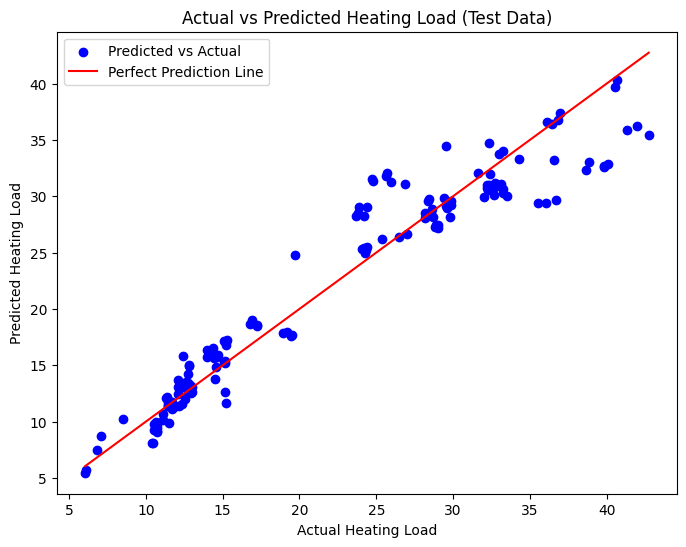

In [7]:
#  NOT SURE KUNG TAMA 'TO

#  Create the plot
plt.figure(figsize=(8, 6))

# Scatter plot of true vs predicted values
plt.scatter(y1_test, y1_test_pred, color='blue', label='Predicted vs Actual')

# Plot the perfect prediction line (y = x)
plt.plot([min(y1_test), max(y1_test)], [min(y1_test), max(y1_test)], color='red', label='Perfect Prediction Line')

# Add labels and title
plt.xlabel('Actual Heating Load')
plt.ylabel('Predicted Heating Load')
plt.title('Actual vs Predicted Heating Load (Test Data)')
plt.legend()

# Show the plot
plt.show()


### 4. What are the best model’s coefficients, intercept, and its training, validation, and test accuracy?

In [8]:
# 1. Get the model's coefficients and intercept
coefficients = final_model.coef_  # Coefficients of the features
intercept = final_model.intercept_  # Intercept term

print("Coefficients of the final model:", coefficients)
print("Intercept of the final model:", intercept)

# 2. Calculate R² score for training data
y1_train_val_pred = final_model.predict(X_train_val)  # Predict on the combined training + validation set
r2_train = r2_score(y1_train_val, y1_train_val_pred)
print(f"R² score on the training data (combined training + validation): {r2_train:.4f}")

# 3. Calculate R² score for the test data
y1_test_pred = final_model.predict(X_test)  # Predict on the test data
r2_test = r2_score(y1_test, y1_test_pred)
print(f"Final R² score on the test data: {r2_test:.4f}")

# 4. Print the validation R² score
print(f"Best R² score on the validation data: {best_r2:.4f}")


Coefficients of the final model: [-6.46491106e+01 -6.20235124e-02  3.63600010e-02 -4.91557355e-02
  4.15685544e+00 -7.43940536e-02  1.96224529e+01  2.43121057e-01]
Intercept of the final model: 83.60309367005028
R² score on the training data (combined training + validation): 0.9128
Final R² score on the test data: 0.9291
Best R² score on the validation data: 0.9026


### 5. What are the top 5 features among X1 to X8? 

In [10]:
# Extract the coefficients of the trained model
coefficients = ridge_model.coef_.flatten()  # Flatten the coefficient array if it's in 2D

# Get the feature names from the training data
feature_names = X_train.columns

# Create a DataFrame to hold feature names and their corresponding coefficients
coef_df = pd.DataFrame({
    'Feature': feature_names,
    'Coefficient': coefficients
})

# Sort the features by the absolute value of their coefficients (importance)
coef_df['Absolute Coefficient'] = np.abs(coef_df['Coefficient'])
top_features = coef_df.sort_values(by='Absolute Coefficient', ascending=False).head(5)

# Print the top 5 features and their coefficients
print("Top 5 most important features for predicting Heating Load:")
print(top_features[['Feature', 'Coefficient']])

Top 5 most important features for predicting Heating Load:
                     Feature  Coefficient
2                  Wall Area     0.100707
3                  Roof Area    -0.074483
7  Glazing Area Distribution     0.072228
1               Surface Area    -0.048259
4             Overall Height     0.042867


## Guide Questions
### 1. What is the impact of removing certain features on the model’s performance?



>Answer:



### 2. Why is it necessary to split the data into training, validation, and testing sets? What could happen if this step is skipped?

>Answer:

### 3. How can the generalization ability of the model be assessed using the test data? What steps would you take to ensure the model generalizes well to unseen data?

>Answer: